<a href="https://colab.research.google.com/github/robinacharya/Ensemble-Machine-Learning-Algorithms-for-Real-World-Data-RWD-/blob/Random-Forest/Random_Forest_Classif_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module-2: **Random Forest Ensemble Classification**

In [1]:
!pip install scikit-learn

In [2]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, auc, cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [3]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Load the dataset from Google Drive
path_to_dataset = "/content/drive/MyDrive/german_credit_data.csv"
df = pd.read_csv(path_to_dataset)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
# Drop the unnamed column if any
# Identify and drop unnamed columns
Unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
df = df.drop(columns=Unnamed_columns, axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
# Replace 'NA' in the 'Saving accounts' column with the mode
mode_sa = df['Saving accounts'].mode().iloc[0]
df['Saving accounts'].fillna(mode_sa, inplace=True)

# Replace 'NA' in the 'Checking account' column with the mode
mode_ca = df['Checking account'].mode().iloc[0]
df['Checking account'].fillna(mode_ca, inplace=True)

# Impute numeric columns like 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute other numeric columns like 'Credit amount' and 'Duration' with the median
df['Credit amount'].fillna(df['Credit amount'].median(), inplace=True)
df['Duration'].fillna(df['Duration'].median(), inplace=True)


In [9]:
na_values_present = (df == 'NA').any()
na_values_present_total_no = (df == 'NA').any().sum()
na_values_present

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Risk                False
dtype: bool

In [10]:
na_values_present_total_no

0

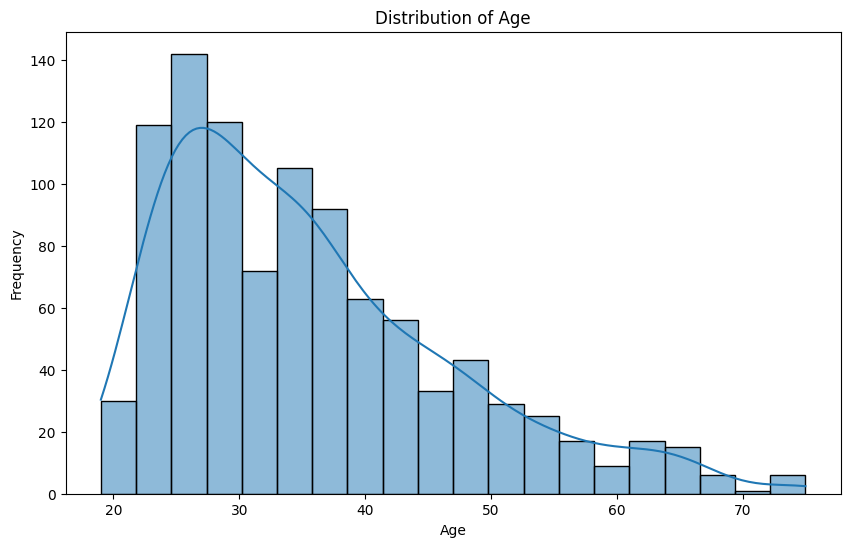

In [11]:
# Exploratory Data Analysis (EDA)

# Plot 1: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

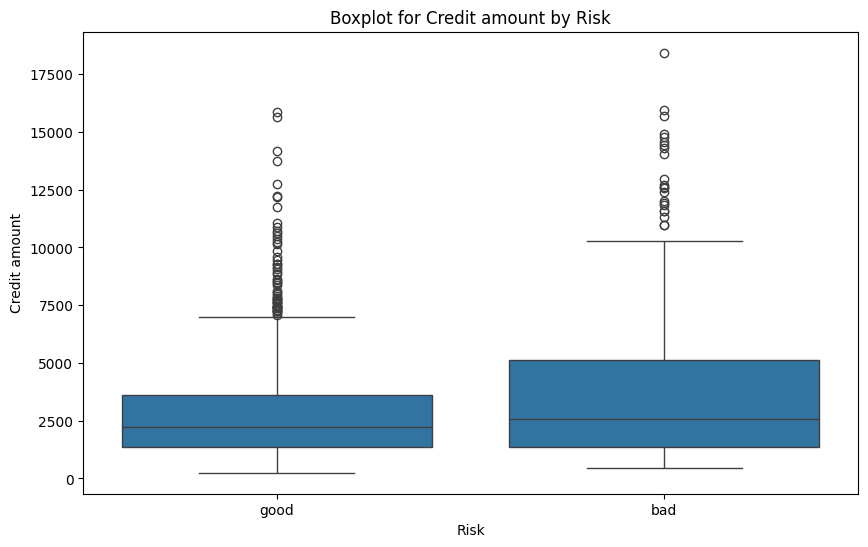

In [12]:
# Plot 2: Boxplot for Credit amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Credit amount', data=df)
plt.title('Boxplot for Credit amount by Risk')
plt.show()

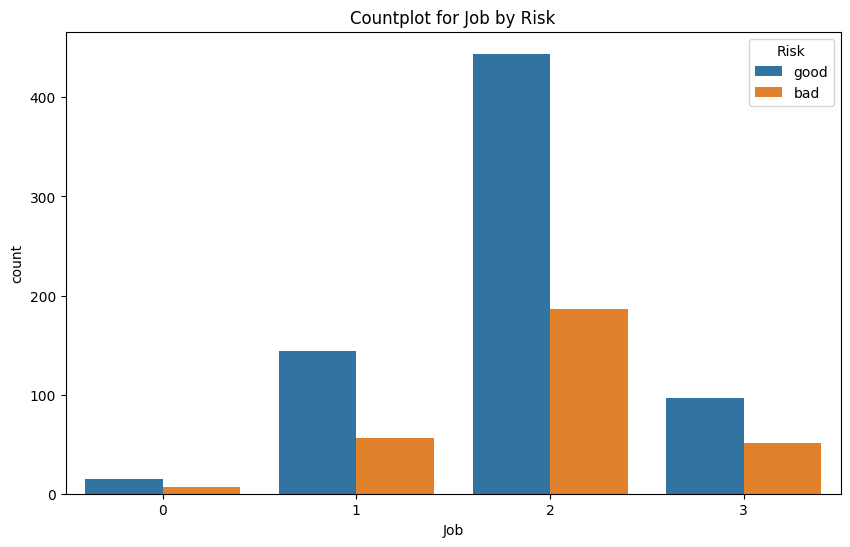

In [13]:
# Plot 3: Countplot for Job
plt.figure(figsize=(10, 6))
sns.countplot(x='Job', hue='Risk', data=df)
plt.title('Countplot for Job by Risk')
plt.show()

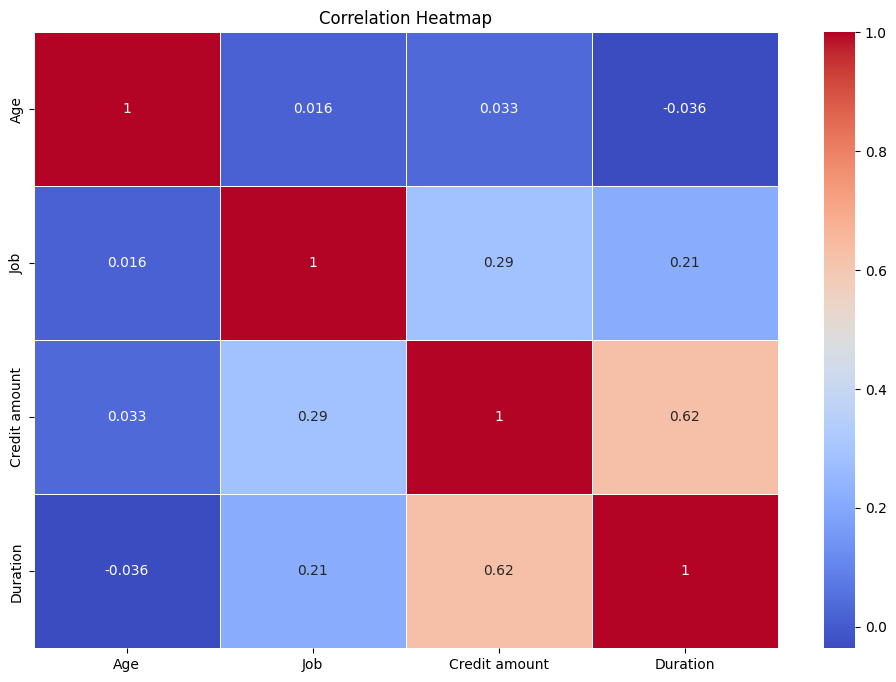

In [14]:
# Plot 4: Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=.5) # Use numeric_df instead of df
plt.title('Correlation Heatmap')
plt.show()

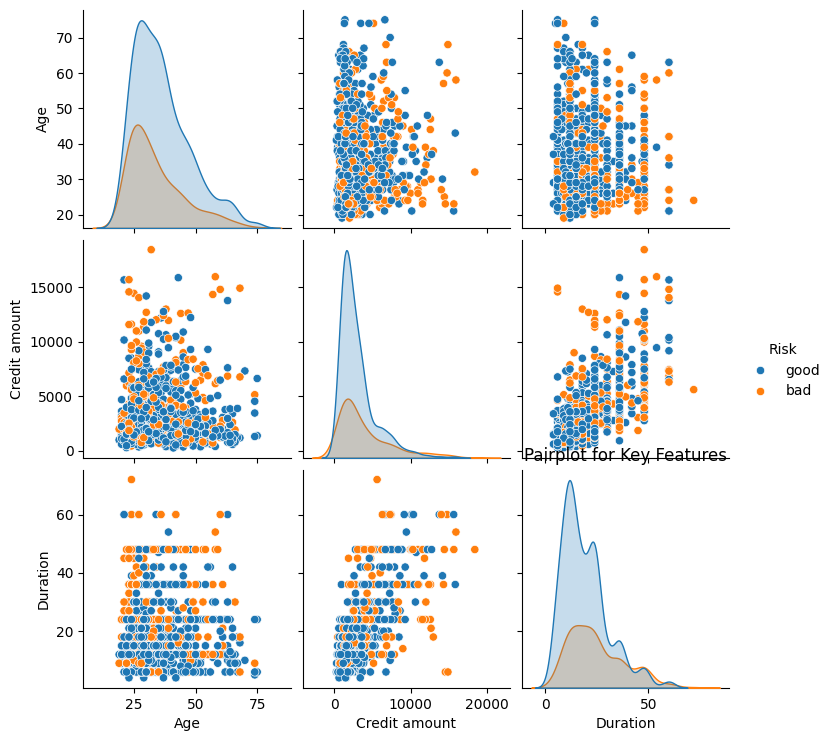

In [15]:
# Plot 5: Pairplot for key features
sns.pairplot(df[['Age', 'Credit amount', 'Duration', 'Risk']], hue='Risk')
plt.title('Pairplot for Key Features')
plt.show()

In [16]:
# Select only the numeric columns for normalization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler
scaler = StandardScaler()

# Normalize the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,male,0.146949,own,little,little,-0.745131,-1.236478,radio/TV,good
1,-1.191404,female,0.146949,own,little,moderate,0.949817,2.248194,radio/TV,bad
2,1.183312,male,-1.383771,own,little,little,-0.416562,-0.738668,education,good
3,0.831502,male,0.146949,free,little,little,1.634247,1.750384,furniture/equipment,good
4,1.535122,male,0.146949,free,little,little,0.566664,0.256953,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,-0.399832,female,-1.383771,own,little,little,-0.544162,-0.738668,furniture/equipment,good
996,0.391740,male,1.677670,own,little,little,0.207612,0.754763,car,good
997,0.215835,male,0.146949,own,little,little,-0.874503,-0.738668,radio/TV,good
998,-1.103451,male,0.146949,free,little,little,-0.505528,1.999289,radio/TV,bad


In [17]:
# Assuming 'Risk' is the target variable
X = df.drop('Risk', axis=1)
y = df['Risk'].map({'good': 0, 'bad': 1})

In [18]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Random Forest Model

# Create Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)


In [21]:
# Fit the classifier to the training data
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_
n_estimators = rf_model.n_estimators


In [22]:
feature_importances, n_estimators

(array([0.19073801, 0.05714094, 0.25217034, 0.17753446, 0.03487576,
        0.03784885, 0.01905186, 0.02506469, 0.01574257, 0.01575158,
        0.03761543, 0.01430505, 0.03162416, 0.00617834, 0.01846592,
        0.01923031, 0.0318541 , 0.00845703, 0.00635061]),
 100)

In [23]:
# Predictions on the testing set
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [24]:
# Evaluation Metrics

# Precision, Recall, Confusion Matrix
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

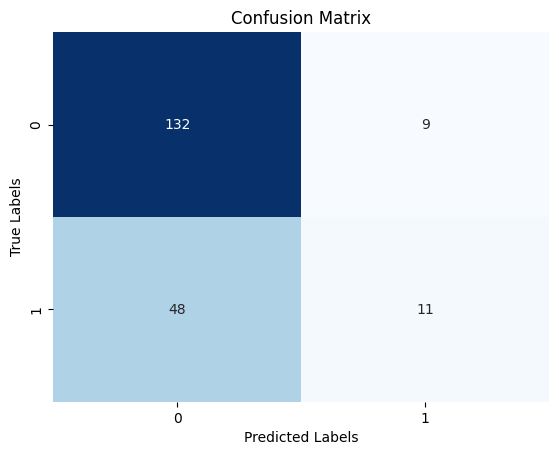

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated conf_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix in color formatting
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# F1-score
f1_rf = f1_score(y_test, y_pred_rf)

In [27]:
# AUC-ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [28]:
# Print evaluation metrics
print(f'Random Forest Model Metrics:')
print(f'Precision: {precision_rf:.2f}')
print(f'Recall: {recall_rf:.2f}')
print(f'F1-score: {f1_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'ROC AUC Score: {roc_auc_rf:.2f}')

Random Forest Model Metrics:
Precision: 0.55
Recall: 0.19
F1-score: 0.28
Confusion Matrix:
[[132   9]
 [ 48  11]]
ROC AUC Score: 0.63


In [29]:
# Training set performance
train_pred_rf = rf_model.predict(X_train)
train_precision_rf = precision_score(y_train, train_pred_rf)
train_recall_rf = recall_score(y_train, train_pred_rf)
train_f1_rf = f1_score(y_train, train_pred_rf)
train_roc_auc_rf = roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])

In [30]:
# Testing set performance
test_precision_rf = precision_score(y_test, y_pred_rf)
test_recall_rf = recall_score(y_test, y_pred_rf)
test_f1_rf = f1_score(y_test, y_pred_rf)

In [31]:
# Print evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nRandom Forest Model Testing Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f'Precision: {test_precision_rf:.2f}')
print(f'Recall: {test_recall_rf:.2f}')
print(f'F1-score: {test_f1_rf:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rf}')
print(f'ROC AUC Score: {roc_auc_rf:.2f}')


Random Forest Model Testing Set Metrics:
Accuracy: 0.715
Precision: 0.55
Recall: 0.19
F1-score: 0.28
Confusion Matrix:
[[132   9]
 [ 48  11]]
ROC AUC Score: 0.63


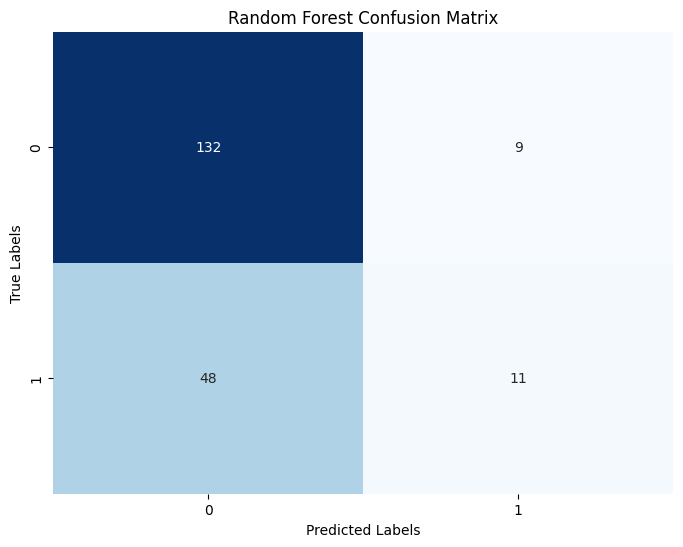

In [32]:
# Random Forest Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

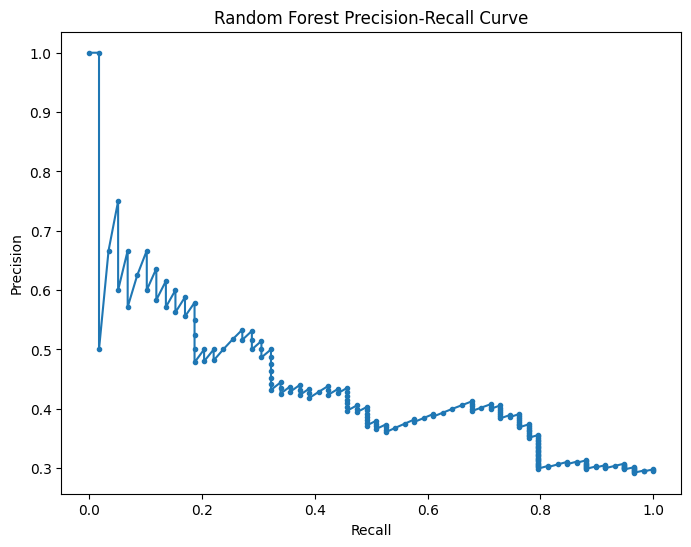

In [33]:
# Precision-Recall Curve
precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_rf, precision_curve_rf, marker='.')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


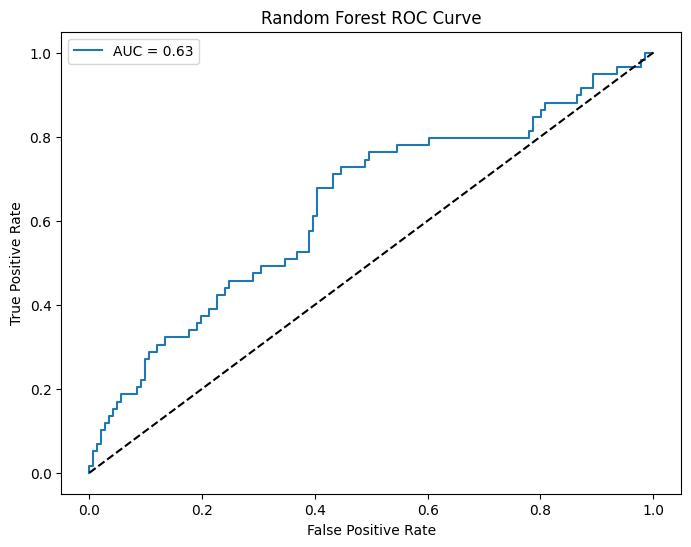

In [34]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

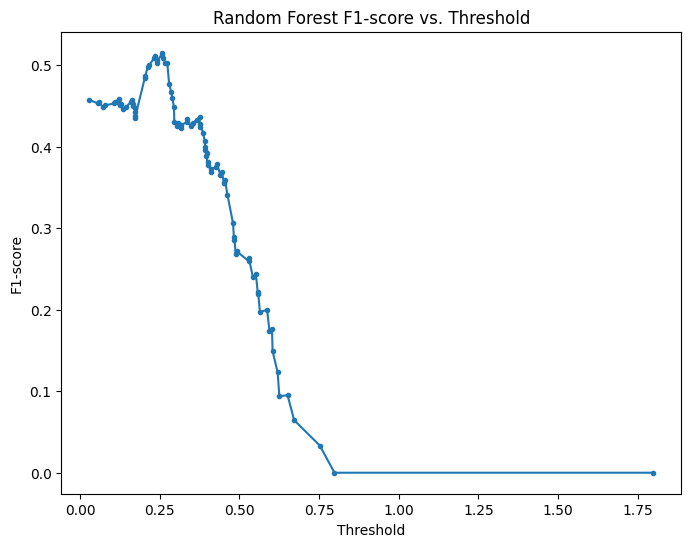

In [35]:
# F1-score Plot
f1_values_rf = [f1_score(y_test, (y_prob_rf > threshold).astype(int)) for threshold in thresholds_rf]
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rf, f1_values_rf, marker='.')
plt.title('Random Forest F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()

In [36]:
# Random Forest Classifier with hyperparameter tuning
# Adding hyperparameter tuning using GridSearchCV

# Random Forest Classifier with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 800],
    'max_depth': [None, 10, 20, 30, 40, 50, 80],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(best_rf)

# Printing the best parameters found by GridSearchCV
print("Best Parameters Found by GridSearchCV:\n", grid_search.best_params_)


Fitting 3 folds for each of 1764 candidates, totalling 5292 fits
RandomForestClassifier(min_samples_leaf=4, n_estimators=400, random_state=42)
Best Parameters Found by GridSearchCV:
 {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 400}


In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import necessary functions

# Training with the best hyperparameters
best_rf.fit(X_train, y_train)

# Evaluating the tuned model
y_pred_rfTuned = best_rf.predict(X_test)

print("Tuned Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rfTuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfTuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rfTuned))

Tuned Model Performance
Accuracy: 0.73
Confusion Matrix:
 [[134   7]
 [ 47  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       141
           1       0.63      0.20      0.31        59

    accuracy                           0.73       200
   macro avg       0.69      0.58      0.57       200
weighted avg       0.71      0.73      0.68       200



In [38]:
# Training set performance
train_pred_rfTuned = best_rf.predict(X_train)
train_precision_rf = precision_score(y_train, train_pred_rfTuned)
train_recall_rf = recall_score(y_train, train_pred_rfTuned)
train_f1_rf = f1_score(y_train, train_pred_rfTuned)
train_roc_auc_rf = roc_auc_score(y_train, best_rf.predict_proba(X_train)[:, 1])

In [39]:
# Evaluation Metrics

# Precision, Recall, Confusion Matrix
precision_rfTuned = precision_score(y_test, y_pred_rfTuned)
recall_rfTuned = recall_score(y_test, y_pred_rfTuned)
conf_matrix_rfTuned = confusion_matrix(y_test, y_pred_rfTuned)

In [40]:
# F1-score
f1_rfTuned = f1_score(y_test, y_pred_rfTuned)

In [42]:
# AUC-ROC
fpr_rfTuned, tpr_rfTuned, thresholds_rfTuned = roc_curve(y_test, y_pred_rfTuned)
roc_auc_rfTuned = auc(fpr_rfTuned, tpr_rfTuned)
roc_auc_rfTuned

0.5768722202187763

In [43]:
# Print evaluation metrics
print(f'Random Forest Model Metrics:')
print(f'Precision: {precision_rfTuned:.2f}')
print(f'Recall: {recall_rfTuned:.2f}')
print(f'F1-score: {f1_rfTuned:.2f}')
print(f'Confusion Matrix:\n{conf_matrix_rfTuned}')
print(f'ROC AUC Score: {roc_auc_rfTuned:.2f}')

Random Forest Model Metrics:
Precision: 0.63
Recall: 0.20
F1-score: 0.31
Confusion Matrix:
[[134   7]
 [ 47  12]]
ROC AUC Score: 0.58


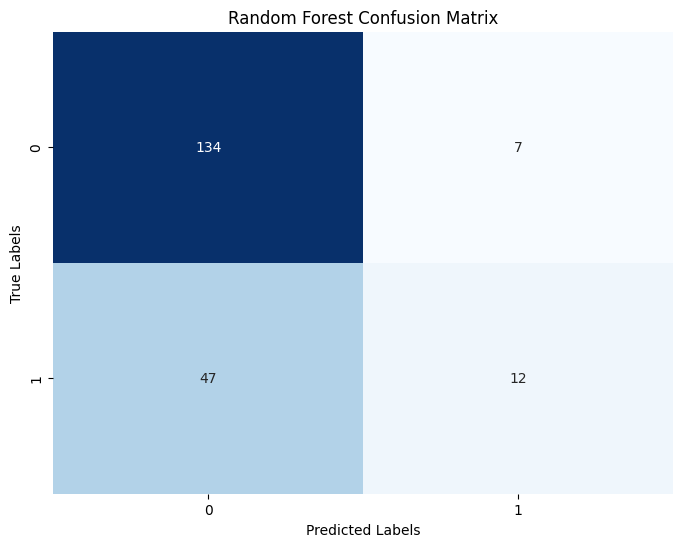

In [44]:
# Random Forest Model Evaluation Metrics

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rfTuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

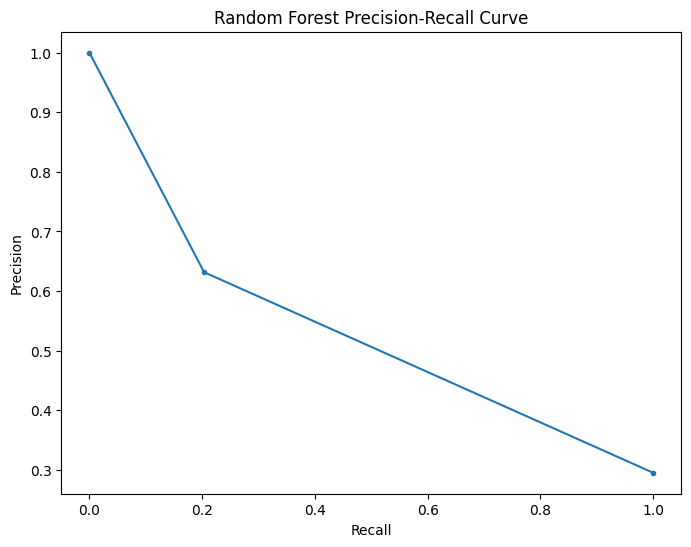

In [46]:
# Precision-Recall Curve
precision_curve_rf, recall_curve_rf, _ = precision_recall_curve(y_test, y_pred_rfTuned)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve_rf, precision_curve_rf, marker='.')
plt.title('Random Forest Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

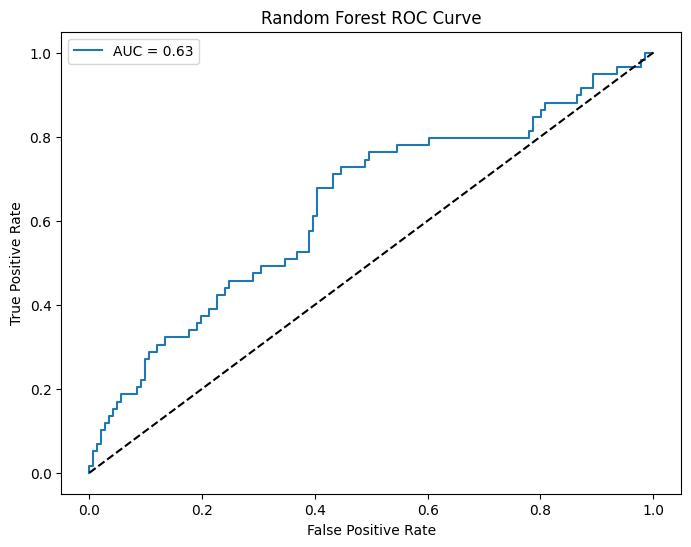

In [47]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

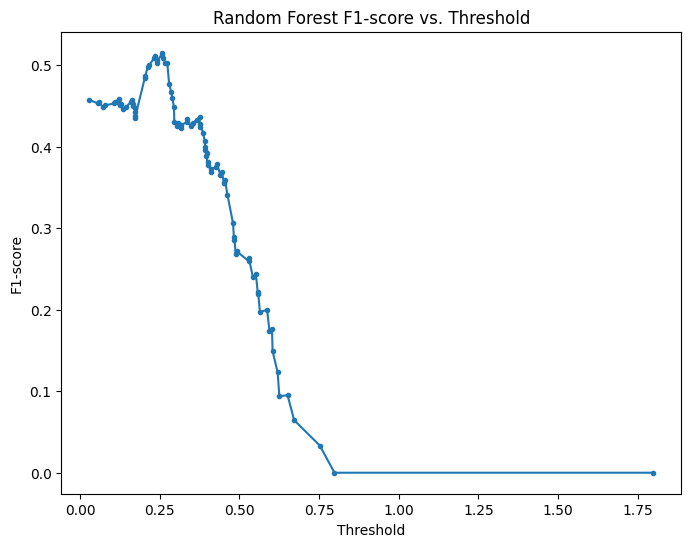

In [48]:
# F1-score Plot
f1_values_rf = [f1_score(y_test, (y_prob_rf > threshold).astype(int)) for threshold in thresholds_rf]
plt.figure(figsize=(8, 6))
plt.plot(thresholds_rf, f1_values_rf, marker='.')
plt.title('Random Forest F1-score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.show()